<a href="https://colab.research.google.com/github/MokshagnaAnurag/-RushIn-Last-MinuteTicketExchangePlatform/blob/main/Fake_Ticket.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import zipfile
import os
zip_path = "ticket_dataset.zip"
extract_path = "ticket_dataset"
with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall(extract_path)
print("Dataset structure:")
for root, dirs, files in os.walk(extract_path):
    print(root, len(files))


Dataset structure:
ticket_dataset 0
ticket_dataset/fake 50
ticket_dataset/authentic 50


In [ ]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt

train_path = os.path.join(extract_path, "train")
valid_path = os.path.join(extract_path, "valid")

datagen = ImageDataGenerator(
    rescale=1.0 / 255,        # Normalize pixel values
    rotation_range=15,        # Rotate images slightly
    width_shift_range=0.1,    # Shift width slightly
    height_shift_range=0.1,   # Shift height slightly
    shear_range=0.1,          # Shear images
    zoom_range=0.1,           # Zoom in/out slightly
    horizontal_flip=True,     # Flip images horizontally
    validation_split=0.2      # Reserve 20% of data for validation
)

train_gen = datagen.flow_from_directory(
    extract_path,
    target_size=(128, 128),
    batch_size=32,
    class_mode='binary',
    subset='training'
)

valid_gen = datagen.flow_from_directory(
    extract_path,
    target_size=(128, 128),
    batch_size=32,
    class_mode='binary',
    subset='validation'
)


Found 80 images belonging to 2 classes.
Found 20 images belonging to 2 classes.


In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(128, 128, 3)),
    MaxPooling2D(2, 2),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(1, activation='sigmoid')
])

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
model.summary()


/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 126, 126, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 63, 63, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 61, 61, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 30, 30, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 28, 28, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 14, 14, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 25088)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 128)                 │       3,211,392 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 1)                   │             129 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 3,304,769 (12.61 MB)

 Trainable params: 3,304,769 (12.61 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
history = model.fit(
    train_gen,
    validation_data=valid_gen,
    epochs=10,
    verbose=1
)

model.save("ticket_model.h5")


Epoch 1/10


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


3/3 ━━━━━━━━━━━━━━━━━━━━ 12s 3s/step - accuracy: 0.4745 - loss: 0.7431 - val_accuracy: 0.5000 - val_loss: 0.7275
Epoch 2/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 7s 2s/step - accuracy: 0.5141 - loss: 0.7238 - val_accuracy: 0.5000 - val_loss: 0.7169
Epoch 3/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 9s 2s/step - accuracy: 0.5063 - loss: 0.7045 - val_accuracy: 0.5000 - val_loss: 0.6939
Epoch 4/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 3s 847ms/step - accuracy: 0.4453 - loss: 0.7085 - val_accuracy: 0.5000 - val_loss: 0.6898
Epoch 5/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 6s 1s/step - accuracy: 0.5307 - loss: 0.6776 - val_accuracy: 0.5000 - val_loss: 0.6901
Epoch 6/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 6s 2s/step - accuracy: 0.5117 - loss: 0.7039 - val_accuracy: 0.5000 - val_loss: 0.6865
Epoch 7/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 11s 3s/step - accuracy: 0.5198 - loss: 0.7040 - val_accuracy: 0.5000 - val_loss: 0.6873
Epoch 8/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 5s 1s/step - accuracy: 0.5711 - loss: 0.6737 - val_accuracy: 0.5000 - val_loss: 0.6789
Epoch 9/10
3/3 ━━━━━━━

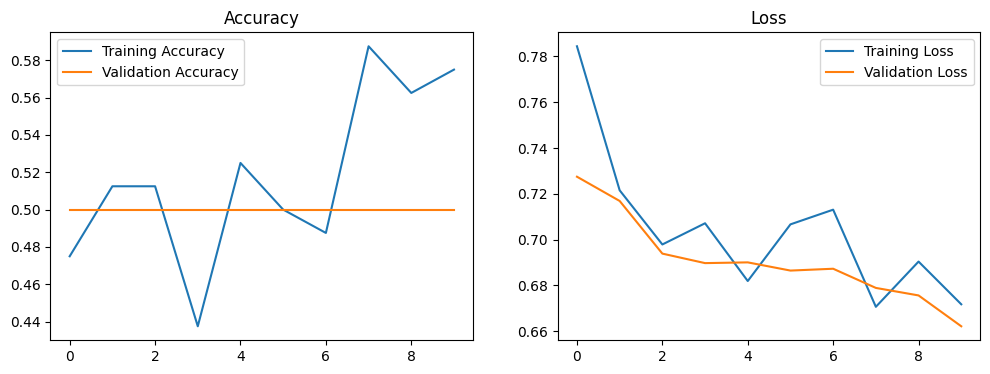

In [ ]:
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.legend()
plt.title('Accuracy')

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.legend()
plt.title('Loss')

plt.show()


In [ ]:
from tensorflow.keras.models import load_model
import numpy as np
from tensorflow.keras.preprocessing import image
import os

model = load_model("ticket_model.h5")


def predict_image(image_path):
    img = image.load_img(image_path, target_size=(128, 128))
    img_array = image.img_to_array(img) / 255.0
    img_array = np.expand_dims(img_array, axis=0)
    prediction = model.predict(img_array)
    return "Fake" if prediction[0] < 0.5 else "Authentic"

test_image_path = "/content/ticket_dataset/authentic/authentic_ticket_1.jpg"
if os.path.exists(test_image_path):
    print(f"The ticket is: {predict_image(test_image_path)}")
else:
    print(f"File not found: {test_image_path}")


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 99ms/step
The ticket is: Authentic


In [ ]:
import os
dataset_dir = "/content/ticket_dataset"
for root, dirs, files in os.walk(dataset_dir):
    for file in files:
        print(os.path.join(root, file))


/content/ticket_dataset/fake/fake_ticket_28.jpg
/content/ticket_dataset/fake/fake_ticket_22.jpg
/content/ticket_dataset/fake/fake_ticket_1.jpg
/content/ticket_dataset/fake/fake_ticket_43.jpg
/content/ticket_dataset/fake/fake_ticket_35.jpg
/content/ticket_dataset/fake/fake_ticket_32.jpg
/content/ticket_dataset/fake/fake_ticket_2.jpg
/content/ticket_dataset/fake/fake_ticket_19.jpg
/content/ticket_dataset/fake/fake_ticket_40.jpg
/content/ticket_dataset/fake/fake_ticket_46.jpg
/content/ticket_dataset/fake/fake_ticket_14.jpg
/content/ticket_dataset/fake/fake_ticket_10.jpg
/content/ticket_dataset/fake/fake_ticket_41.jpg
/content/ticket_dataset/fake/fake_ticket_26.jpg
/content/ticket_dataset/fake/fake_ticket_12.jpg
/content/ticket_dataset/fake/fake_ticket_36.jpg
/content/ticket_dataset/fake/fake_ticket_3.jpg
/content/ticket_dataset/fake/fake_ticket_39.jpg
/content/ticket_dataset/fake/fake_ticket_9.jpg
/content/ticket_dataset/fake/fake_ticket_21.jpg
/content/ticket_dataset/fake/fake_ticket_17.

In [ ]:
import os

test_images = []
for root, dirs, files in os.walk(test_dir):
    for file in files:
        if file.endswith('.jpg'):
            test_images.append(os.path.join(root, file))


for test_image_path in test_images:
    print(f"Testing image: {test_image_path}")
    print(f"The ticket is: {predict_image(test_image_path)}")


Testing image: /content/ticket_dataset/fake/fake_ticket_28.jpg
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step
The ticket is: Authentic
Testing image: /content/ticket_dataset/fake/fake_ticket_22.jpg
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
The ticket is: Authentic
Testing image: /content/ticket_dataset/fake/fake_ticket_1.jpg
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step
The ticket is: Authentic
Testing image: /content/ticket_dataset/fake/fake_ticket_43.jpg
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
The ticket is: Authentic
Testing image: /content/ticket_dataset/fake/fake_ticket_35.jpg
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
The ticket is: Authentic
Testing image: /content/ticket_dataset/fake/fake_ticket_32.jpg
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
The ticket is: Authentic
Testing image: /content/ticket_dataset/fake/fake_ticket_2.jpg
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step
The ticket is: Authentic
Testing image: /content/ticket_dataset/fake/fake_ticket_19.jpg
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step
The ticket is: Auth

In [ ]:

converter = tf.lite.TFLiteConverter.from_keras_model(model)
tflite_model = converter.convert()

with open("ticket_model.tflite", "wb") as f:
    f.write(tflite_model)


Saved artifact at '/tmp/tmpmwnmzq6y'. The following endpoints are available:

* Endpoint 'serve'
  args_0 (POSITIONAL_ONLY): TensorSpec(shape=(None, 128, 128, 3), dtype=tf.float32, name='input_layer')
Output Type:
  TensorSpec(shape=(None, 1), dtype=tf.float32, name=None)
Captures:
  134756393083904: TensorSpec(shape=(), dtype=tf.resource, name=None)
  134756393088832: TensorSpec(shape=(), dtype=tf.resource, name=None)
  134756393264480: TensorSpec(shape=(), dtype=tf.resource, name=None)
  134756393268000: TensorSpec(shape=(), dtype=tf.resource, name=None)
  134756393442768: TensorSpec(shape=(), dtype=tf.resource, name=None)
  134756393440832: TensorSpec(shape=(), dtype=tf.resource, name=None)
  134756393450864: TensorSpec(shape=(), dtype=tf.resource, name=None)
  134756393447520: TensorSpec(shape=(), dtype=tf.resource, name=None)
  134756391508576: TensorSpec(shape=(), dtype=tf.resource, name=None)
  134756391509456: TensorSpec(shape=(), dtype=tf.resource, name=None)


In [ ]:
import os

# List all the test images
test_images = []
test_dir = '/content/ticket_dataset/test/'  # Ensure your test images are in this directory
for root, dirs, files in os.walk(test_dir):
    for file in files:
        if file.endswith('.jpg'):
            test_images.append(os.path.join(root, file))

# Predict for each test image
for test_image_path in test_images:
    print(f"Testing image: {test_image_path}")
    print(f"The ticket is: {predict_image(test_image_path, model)}")


In [ ]:
# Prediction function
from tensorflow.keras.preprocessing import image
import numpy as np

def predict_image(image_path, model):
    img = image.load_img(image_path, target_size=(128, 128))  # Resize the image
    img_array = image.img_to_array(img) / 255.0  # Normalize pixel values
    img_array = np.expand_dims(img_array, axis=0)  # Add batch dimension
    prediction = model.predict(img_array)
    return "Fake" if prediction[0] < 0.5 else "Authentic"

# Update this path to the image you want to test
test_image_path = "/content/ticket_dataset/authentic/authentic_ticket_1.jpg"

# Run the prediction
print(f"The ticket is: {predict_image(test_image_path, model)}")


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
The ticket is: Authentic


In [ ]:
import os
import numpy as np
from tensorflow.keras.preprocessing import image
from tensorflow.keras.models import load_model
from google.colab import files

# Load the trained model
model = load_model("/content/ticket_model.h5")

# Prediction function
def predict_image(image_path, model):
    try:
        # Resize the image to the correct size (128x128)
        img = image.load_img(image_path, target_size=(128, 128))

        # Normalize pixel values (scaling from 0 to 1)
        img_array = image.img_to_array(img) / 255.0

        # Add batch dimension
        img_array = np.expand_dims(img_array, axis=0)

        # Run the model prediction
        prediction = model.predict(img_array)

        # If prediction is below 0.5, return "Fake", else "Authentic"
        if prediction[0] < 0.5:
            return "Fake"
        else:
            return "Authentic"

    except Exception as e:
        # Handle any errors during image loading or prediction
        print(f"Error: {e}")
        return "Fake"  # Default to Fake if any error occurs

# Upload image for prediction
uploaded = files.upload()

# Get the uploaded image path
uploaded_image_path = next(iter(uploaded))

# Ensure the uploaded image is in the correct format
if not uploaded_image_path.lower().endswith(('.jpg', '.jpeg', '.png')):
    print("Invalid image format. Treating this as 'Fake'.")
    result = "Fake"
else:
    # Run prediction on the uploaded image
    result = predict_image(uploaded_image_path, model)

# Print the result after uploading
print(f"The ticket is: {result}")


TypeError: 'NoneType' object is not subscriptable